In [7]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import os
import csv
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

primary_type = []

#establishing path to the csv file
csvpath = os.path.join("Crimes_Chicago_-_2020_to_2021- copy.csv")
csvpath2 = os.path.join("clean_crime_df copy.csv")

#creating DataFrame of csv data
crime_df = pd.read_csv(csvpath)
clean_crime_df = pd.read_csv(csvpath2, parse_dates=True, index_col='Date')

#printing DataFrame info
crime_df.head()
clean_crime_df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,12016034,JD193556,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1434,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
2020-01-01,12220321,JD430436,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,413,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2020-01-01,12013828,JD191019,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,814,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
2020-01-01,12019692,JD197444,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1922,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
2020-01-01,12036792,JD216459,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,831,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [8]:
crime_df.count()

ID                      418753
Case Number             418753
Date                    418753
Block                   418753
IUCR                    418753
Primary Type            418753
Description             418753
Location Description    416704
Arrest                  418753
Domestic                418753
Beat                    418753
District                418753
Ward                    418733
Community Area          418752
FBI Code                418753
X Coordinate            411430
Y Coordinate            411430
Year                    418753
Updated On              418753
Latitude                411430
Longitude               411430
Location                411430
dtype: int64

In [9]:
#drop all rows with missing information.
crime_df = crime_df.dropna(how='any')

#confirm new list
crime_df.count()

ID                      409763
Case Number             409763
Date                    409763
Block                   409763
IUCR                    409763
Primary Type            409763
Description             409763
Location Description    409763
Arrest                  409763
Domestic                409763
Beat                    409763
District                409763
Ward                    409763
Community Area          409763
FBI Code                409763
X Coordinate            409763
Y Coordinate            409763
Year                    409763
Updated On              409763
Latitude                409763
Longitude               409763
Location                409763
dtype: int64

In [10]:
crime_df["Description"].value_counts()
#crime_df['Date']= pd.to_datetime(crime_df['Date'])

SIMPLE                             47419
DOMESTIC BATTERY SIMPLE            40184
$500 AND UNDER                     32795
TO PROPERTY                        24767
TO VEHICLE                         23481
                                   ...  
AGG PRO.EMP: OTHER FIREARM             1
SOLICIT FOR BUSINESS                   1
POSSESSION: SYNTHETIC MARIJUANA        1
CONT SUBS:FAIL TO MAINT RECORD         1
EDUCATIONAL INTIMIDAITON               1
Name: Description, Length: 427, dtype: int64

In [11]:
crime_type = crime_df.groupby("Description")
count_crime_types = crime_type["Description"].count()
count_crime_types

Description
$500 AND UNDER                                     32795
ABUSE / NEGLECT - CARE FACILITY                       19
ABUSE/NEGLECT: CARE FACILITY                           4
AGG CRIM SEX ABUSE FAM MEMBER                          6
AGG CRIMINAL SEXUAL ABUSE                              6
                                                   ...  
VIOLENT OFFENDER - DUTY TO REGISTER                   17
VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS        9
VIOLENT OFFENDER: ANNUAL REGISTRATION                 17
VIOLENT OFFENDER: DUTY TO REGISTER                     6
VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS         2
Name: Description, Length: 427, dtype: int64

In [19]:
true_false=crime_df['Arrest'].value_counts()
true_false


False    351347
True      58416
Name: Arrest, dtype: int64

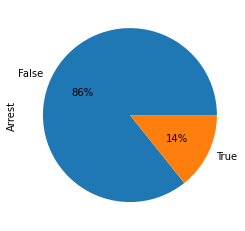

In [22]:
graph = true_false.plot(kind="pie", autopct="%1.0f%%")